In [36]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



In [37]:
df = pd.read_csv('vgsales.csv')
df = df.iloc[:, 1:]

In [38]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [40]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [41]:
df.isna().sum().sort_values(ascending = False).head(5)

Year         271
Publisher     58
Platform       0
Name           0
Genre          0
dtype: int64

In [42]:
df.drop_duplicates(keep='first', inplace = True)
df.duplicated().sum()

np.int64(0)

In [43]:
df = df[df['Year'].isna() != True]
df = df[df['Publisher'].isna() != True]
top40_publisher_df = df[df['Publisher'].isin(df['Publisher'].value_counts()[df['Publisher'].value_counts() > 40].index)]

In [44]:
print(df.shape)
df.isna().sum().sort_values(ascending = False).head(5)

(16291, 10)


Name         0
Platform     0
Year         0
Genre        0
Publisher    0
dtype: int64

In [45]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [46]:
numerical_summary = df.describe()
categorical_summary = df.describe(include=['object'])

skewness = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].skew()
kurtosis = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].kurt()

missing_data = df.isnull().sum()

platform_counts = df['Platform'].value_counts()
genre_counts = df['Genre'].value_counts()
publisher_counts = df['Publisher'].value_counts()

In [47]:
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)
print("\nMissing Data:\n", missing_data)
print("\nPlatform Counts:\n", platform_counts)
print("\nGenre Counts:\n", genre_counts)
print("\nPublisher Counts:\n", publisher_counts)

Numerical Summary:
                Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    2006.405561      0.265647      0.147731      0.078833      0.048426   
std        5.832412      0.822432      0.509303      0.311879      0.190083   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16291.000000  
mean       0.540910  
std        1.567345  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000  

Categorical Summary:
                                Name Platform   

<Axes: title={'center': 'Number of Games Released Per Year'}, xlabel='Year'>

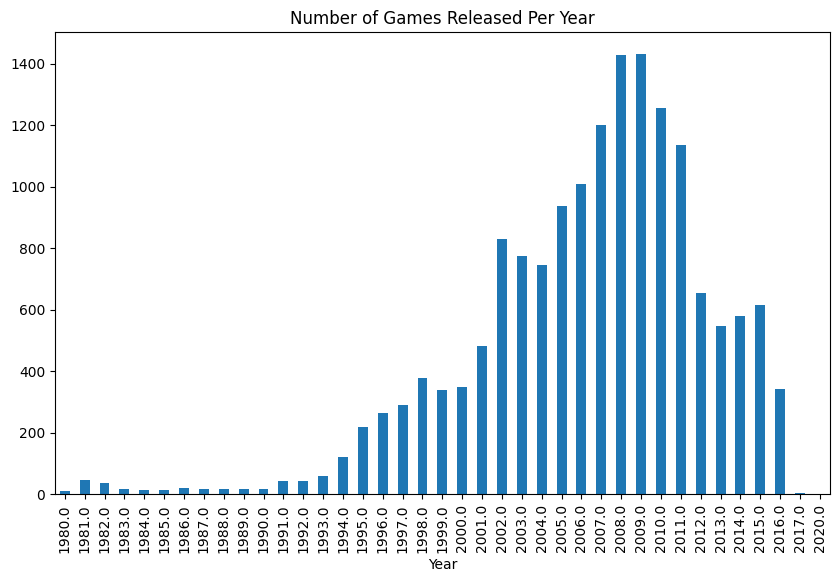

In [48]:
games_per_year = df['Year'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(10,6), title='Number of Games Released Per Year')

<Axes: title={'center': 'Total Sales Per Year by Region'}, xlabel='Year'>

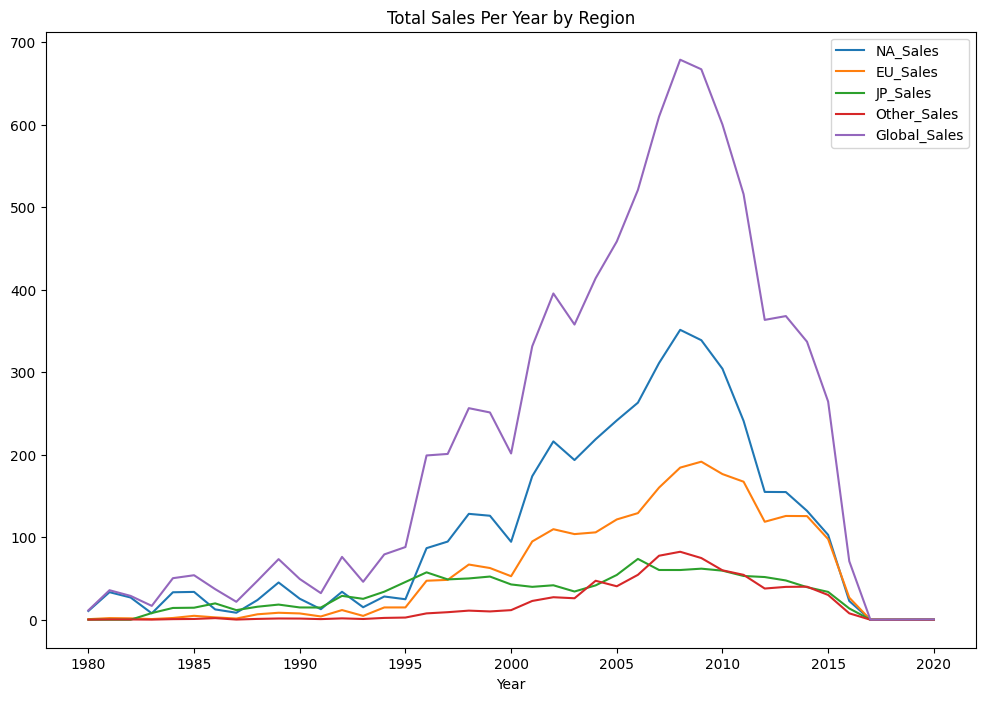

In [49]:
sales_per_year = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sales_per_year.plot(kind='line', figsize=(12,8), title='Total Sales Per Year by Region')

<Axes: title={'center': 'Platform Popularity Over Time'}, xlabel='Year'>

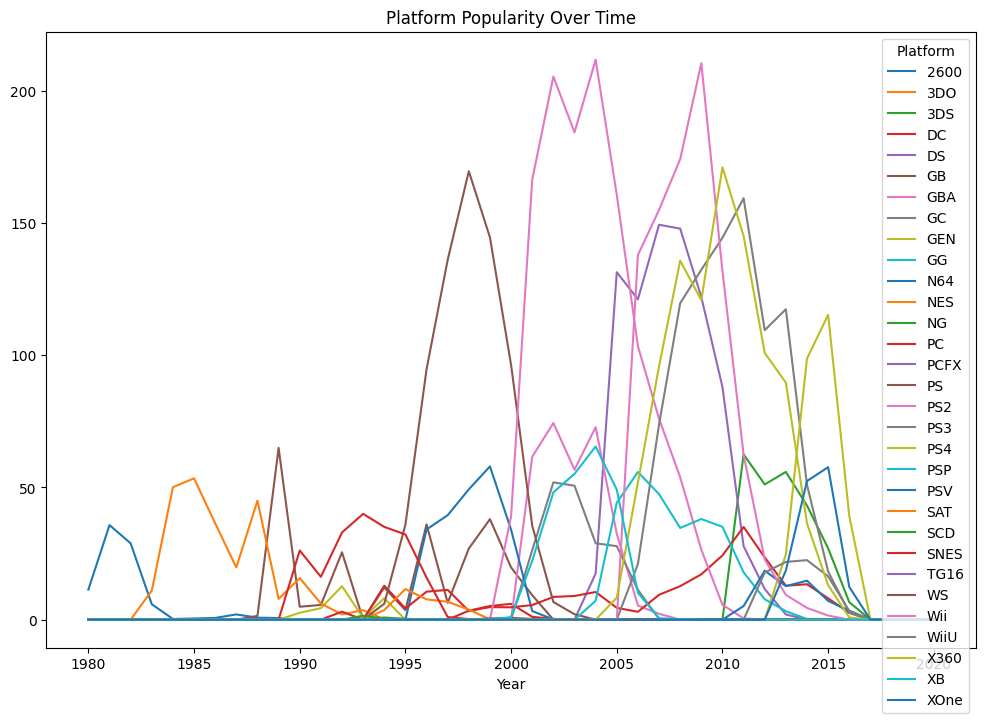

In [50]:
platform_sales_per_year = df.groupby(['Year', 'Platform']).sum()['Global_Sales'].unstack().fillna(0)
platform_sales_per_year.plot(kind='line', stacked=False, figsize=(12,8), title='Platform Popularity Over Time')

<Axes: title={'center': 'Genre Popularity Over Time'}, xlabel='Year'>

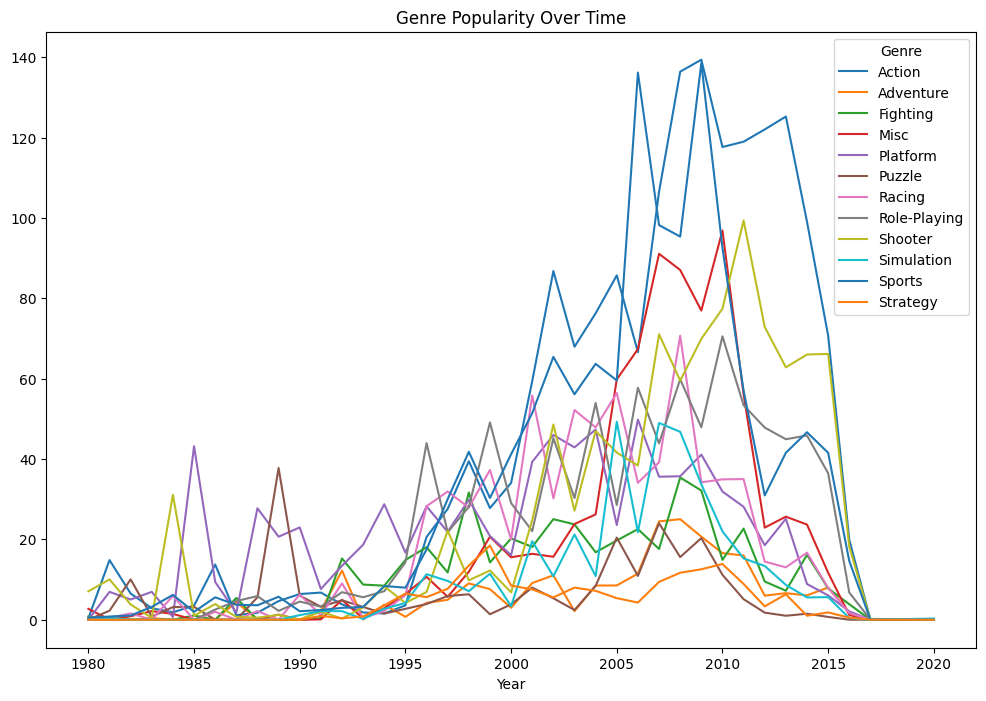

In [51]:
genre_sales_per_year = df.groupby(['Year', 'Genre']).sum()['Global_Sales'].unstack().fillna(0)
genre_sales_per_year.plot(kind='line', stacked=False, figsize=(12,8), title='Genre Popularity Over Time')

<Axes: title={'center': 'Top Publishers Over Time'}, xlabel='Year'>

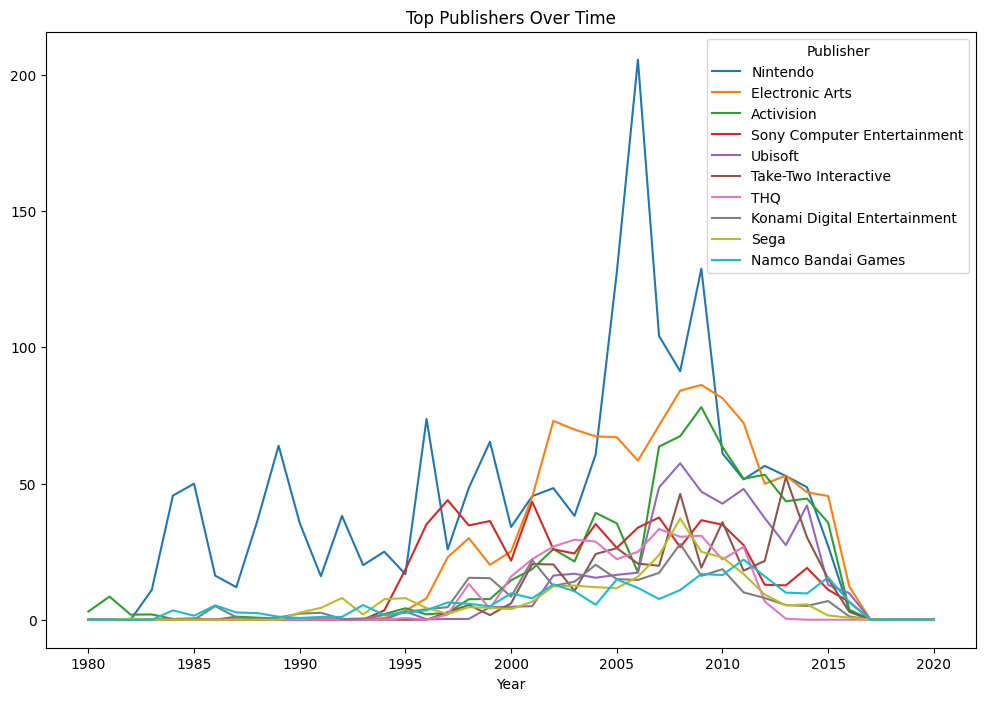

In [52]:
publisher_sales_per_year = df.groupby(['Year', 'Publisher']).sum()['Global_Sales'].unstack().fillna(0)
top_publishers = publisher_sales_per_year.sum().sort_values(ascending=False).head(10).index
publisher_sales_per_year[top_publishers].plot(kind='line', figsize=(12,8), title='Top Publishers Over Time')

<Axes: title={'center': 'Regional Sales Trends Over Time'}, xlabel='Year'>

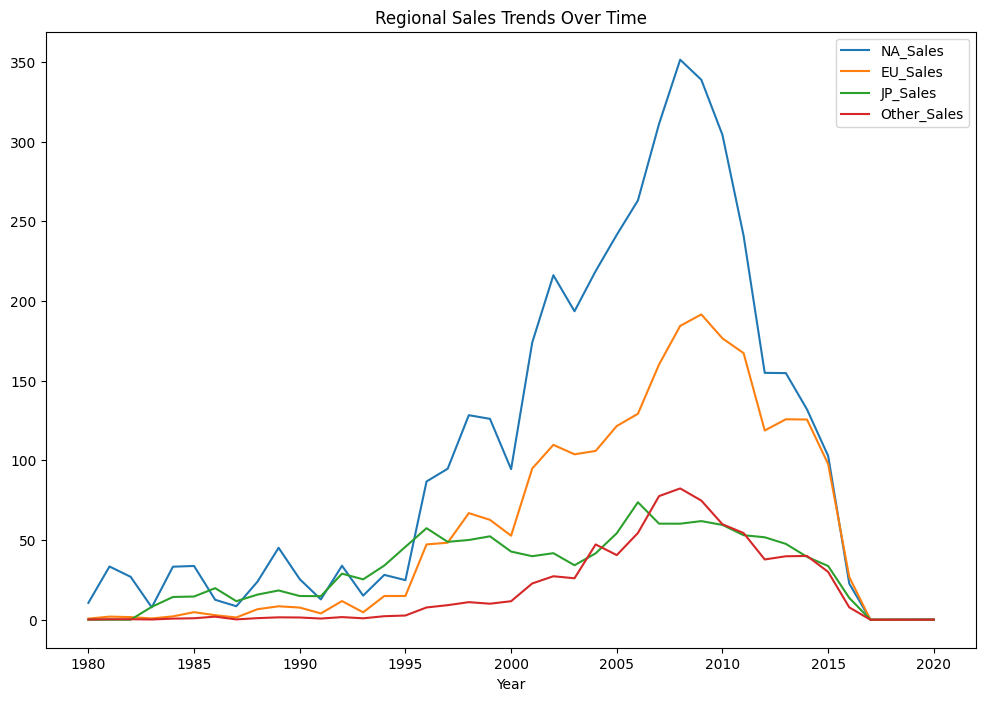

In [53]:
regional_sales_per_year = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
regional_sales_per_year.plot(kind='line', figsize=(12,8), title='Regional Sales Trends Over Time')

<Axes: title={'center': 'Total Sales Distribution by Region'}>

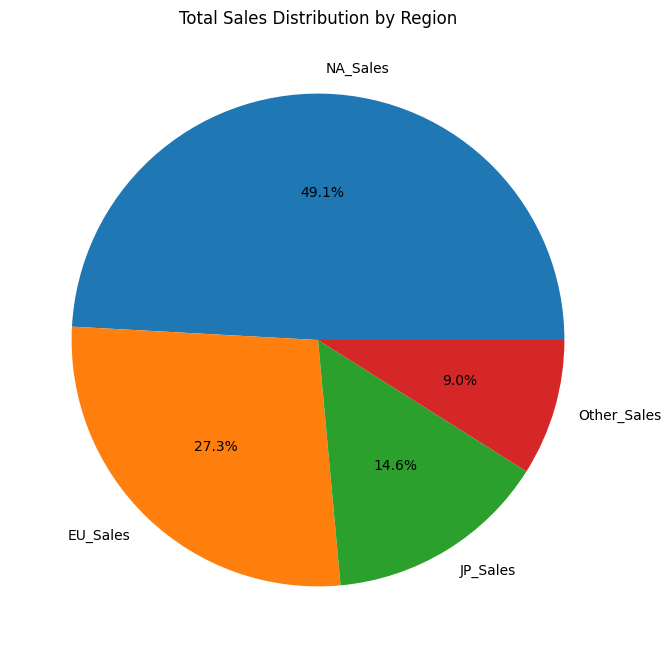

In [54]:
total_sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Total Sales Distribution by Region')

<Axes: title={'center': 'Top 10 Games in North America'}, xlabel='Name'>

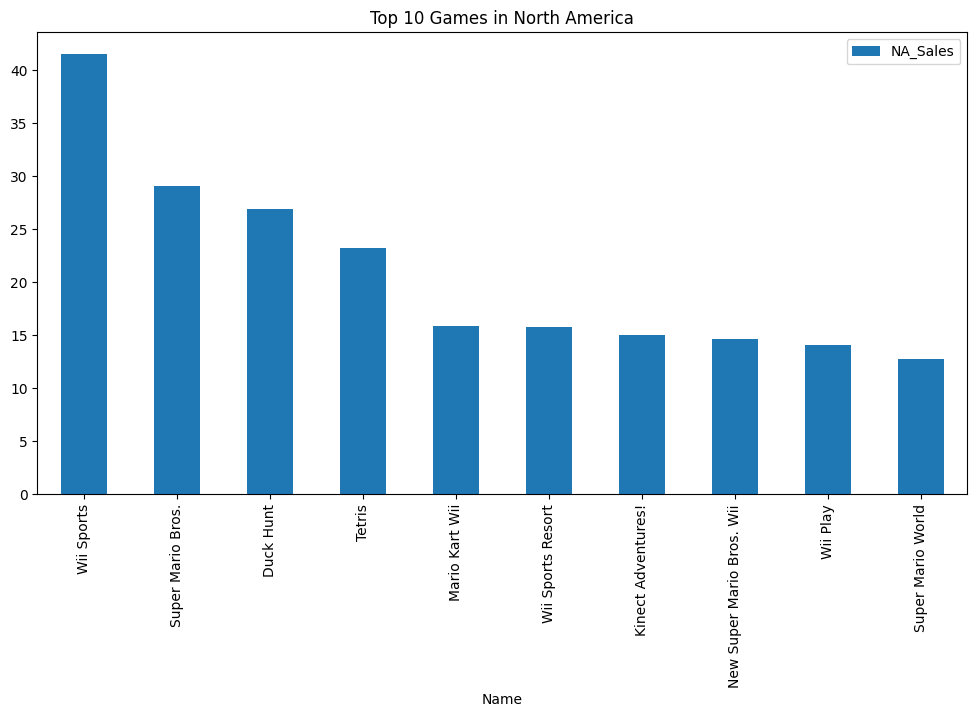

In [55]:
top_games_na = df[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(10)
top_games_eu = df[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(10)
top_games_jp = df[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head(10)
top_games_other = df[['Name', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head(10)
top_games_na.plot(kind='bar', x='Name', y='NA_Sales', figsize=(12,6), title='Top 10 Games in North America')

<Axes: title={'center': 'Genre Popularity by Region'}, xlabel='Genre'>

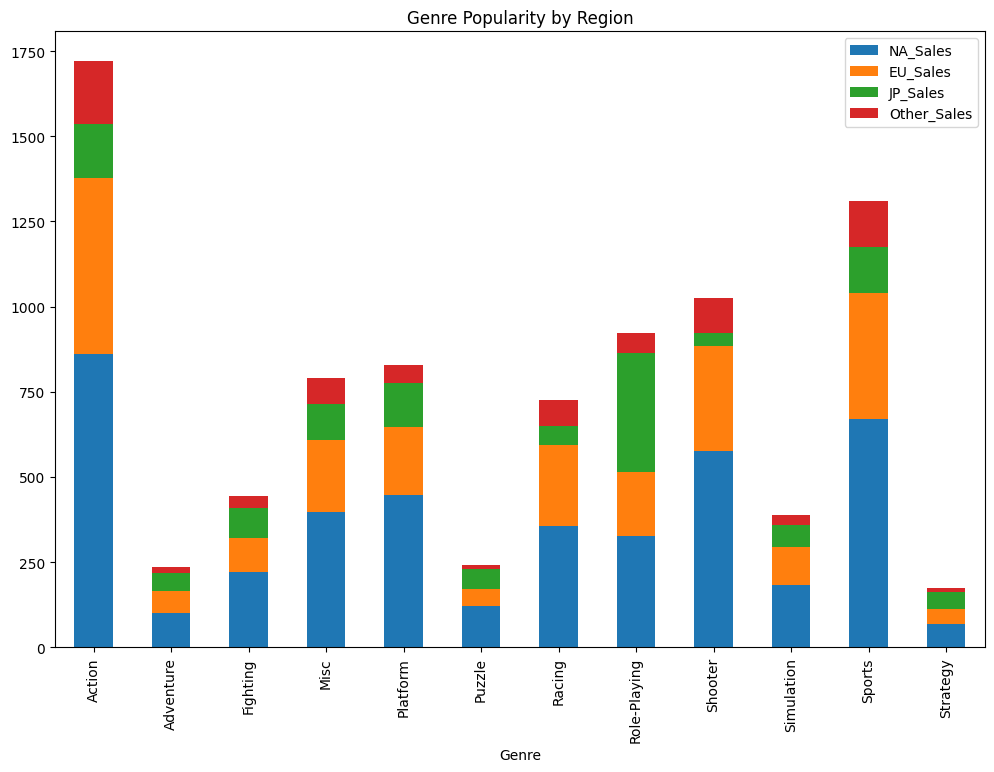

In [56]:
genre_sales_by_region = df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_sales_by_region.plot(kind='bar', stacked=True, figsize=(12,8), title='Genre Popularity by Region')

<Axes: ylabel='Genre'>

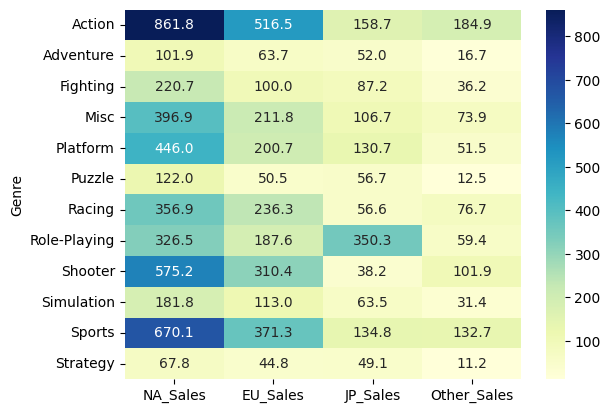

In [57]:
sns.heatmap(genre_sales_by_region, annot=True, cmap="YlGnBu", fmt=".1f")

<Axes: title={'center': 'Regional Sales Trends Over Time'}, xlabel='Year'>

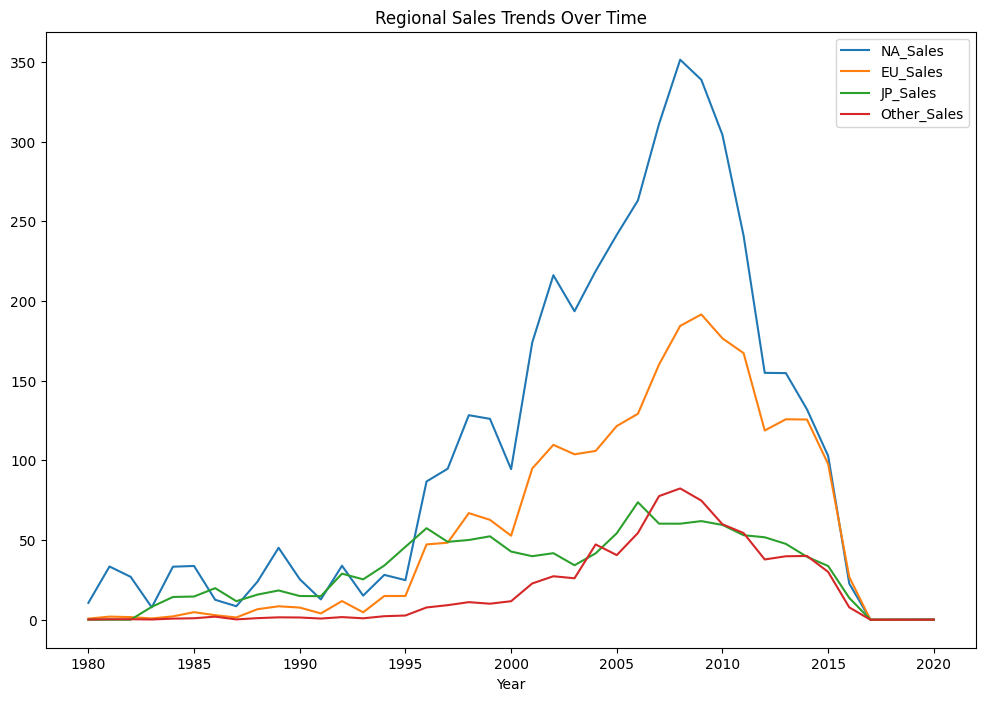

In [58]:
regional_sales_trends = df.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
regional_sales_trends.plot(kind='line', figsize=(12,8), title='Regional Sales Trends Over Time')

<Axes: >

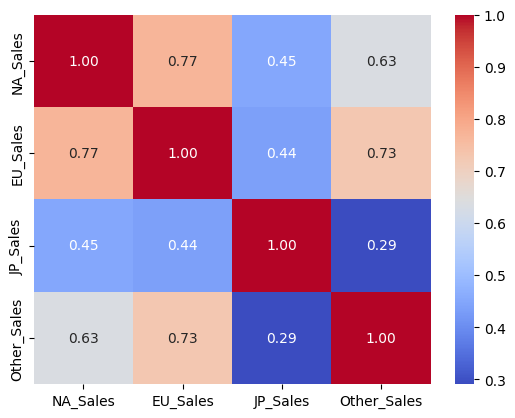

In [59]:
regional_correlation = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()
sns.heatmap(regional_correlation, annot=True, cmap="coolwarm", fmt=".2f")

<Axes: title={'center': 'Top Publishers in North America'}, xlabel='Publisher'>

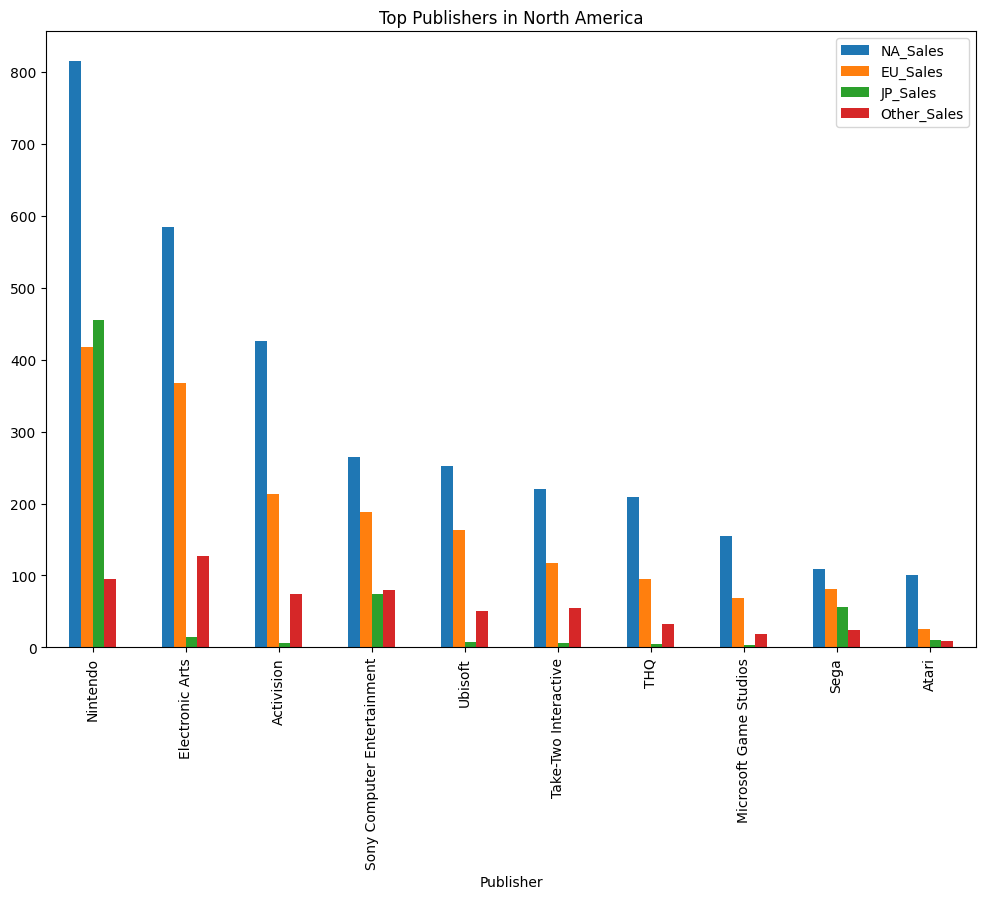

In [60]:
top_publishers_by_region = df.groupby('Publisher').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_publishers_by_region.nlargest(10, 'NA_Sales').plot(kind='bar', figsize=(12,8), title='Top Publishers in North America')

<Axes: title={'center': 'Regional Market Share of Global Sales'}>

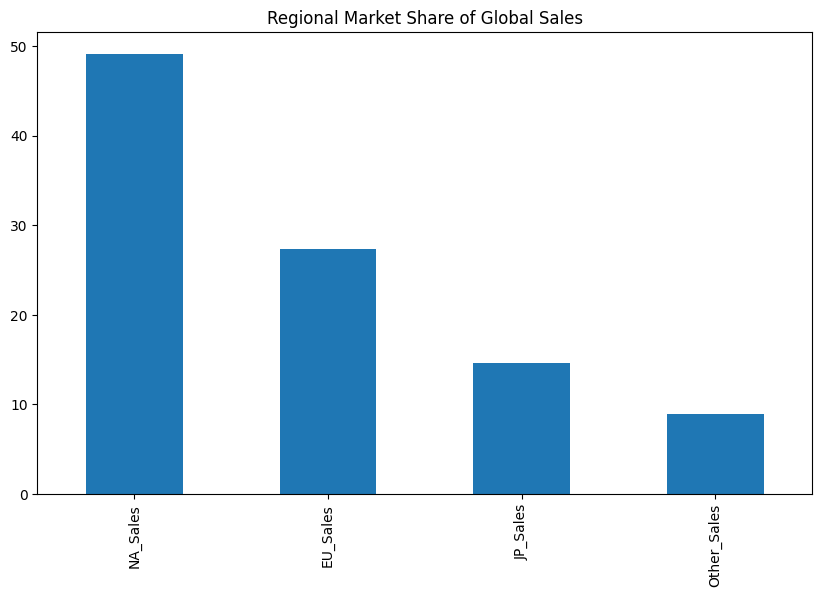

In [61]:
regional_market_share = total_sales_by_region / df['Global_Sales'].sum() * 100
regional_market_share.plot(kind='bar', figsize=(10,6), title='Regional Market Share of Global Sales')

<Axes: title={'center': 'Total Sales by Platform'}, xlabel='Platform'>

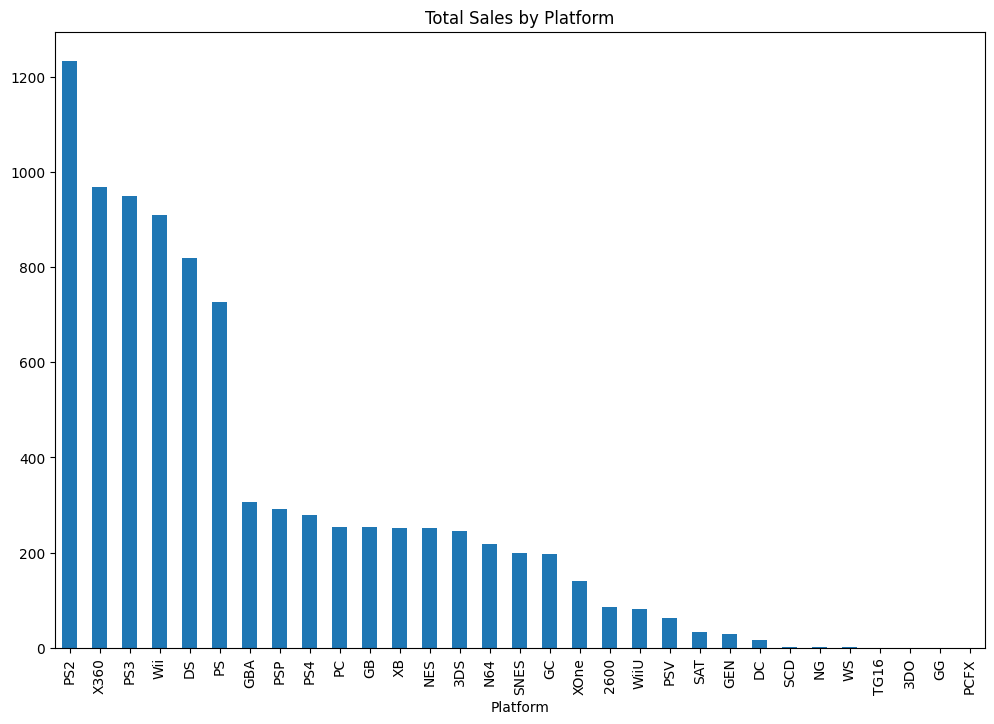

In [62]:
total_sales_by_platform = df.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False)
total_sales_by_platform.plot(kind='bar', figsize=(12,8), title='Total Sales by Platform')

<Axes: title={'center': 'Number of Games Released by Platform'}, xlabel='Platform'>

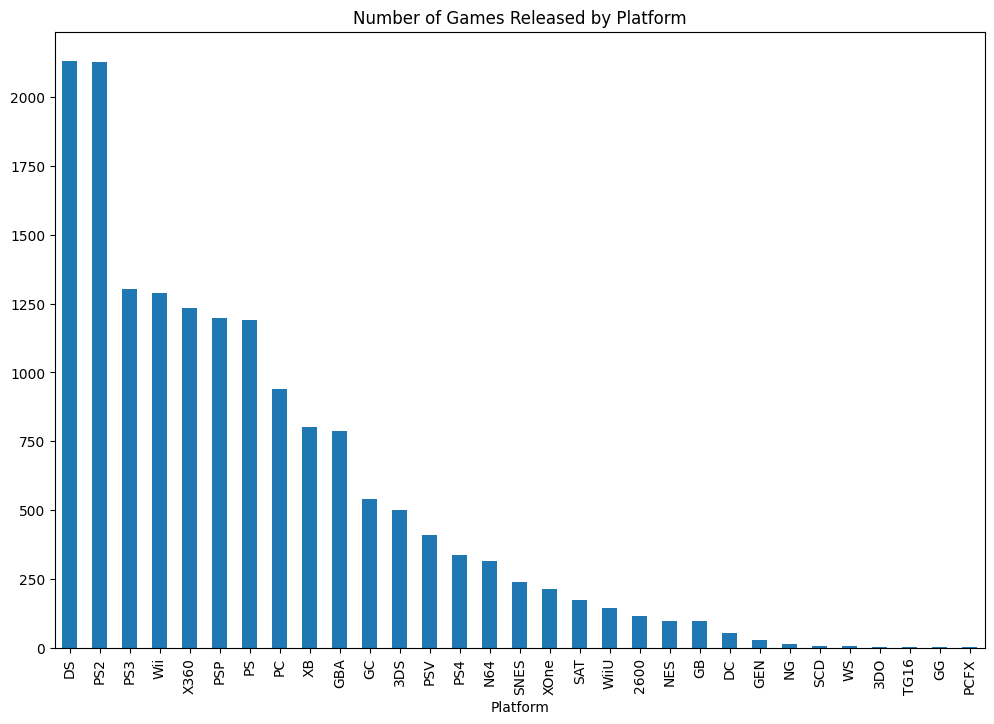

In [63]:
games_per_platform = df['Platform'].value_counts()
games_per_platform.plot(kind='bar', figsize=(12,8), title='Number of Games Released by Platform')

Text(0, 0.5, 'Global Sales')

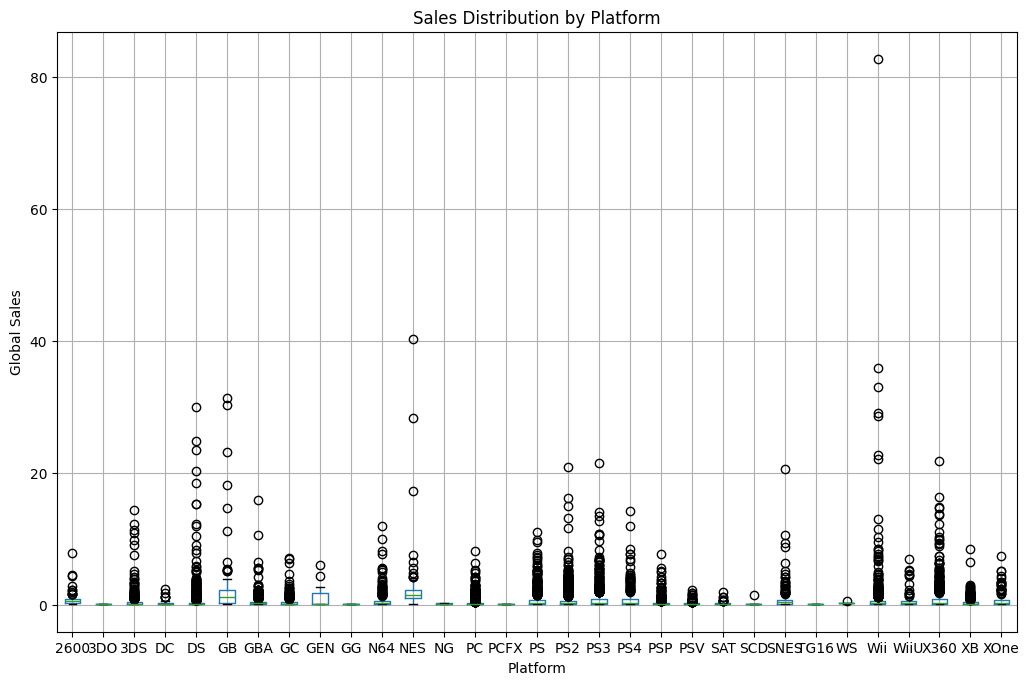

In [64]:
df.boxplot(column='Global_Sales', by='Platform', figsize=(12,8))
plt.title('Sales Distribution by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Global Sales')

<Axes: title={'center': 'Top Platforms by Region'}, xlabel='Platform'>

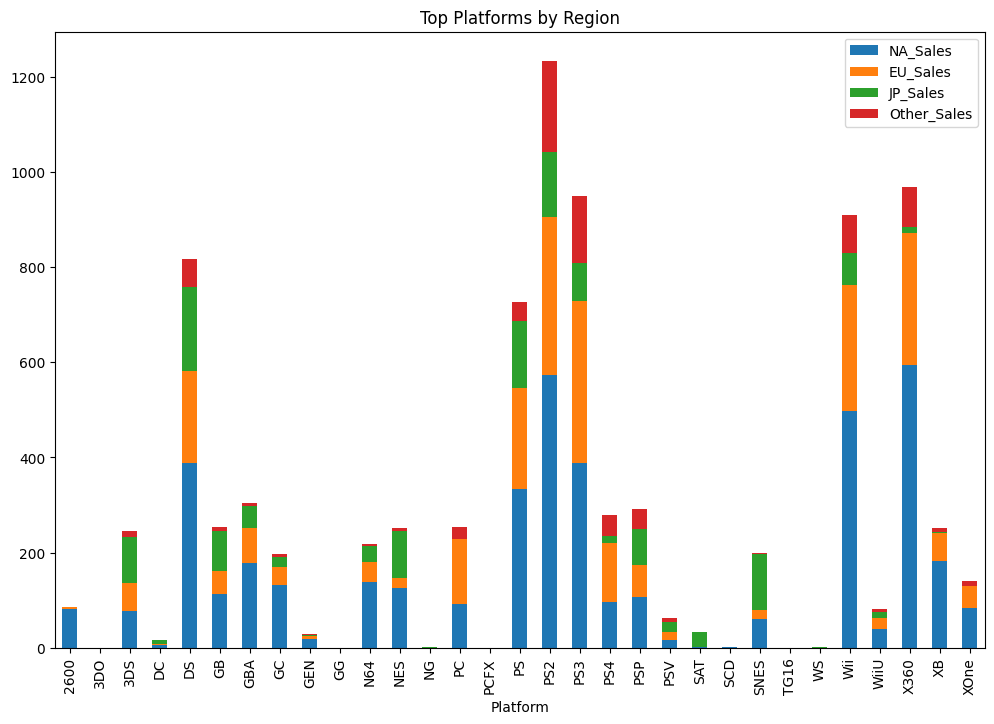

In [65]:
platform_sales_by_region = df.groupby('Platform').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_by_region.plot(kind='bar', stacked=True, figsize=(12,8), title='Top Platforms by Region')

<Axes: title={'center': 'Platform Popularity Over Time'}, xlabel='Year'>

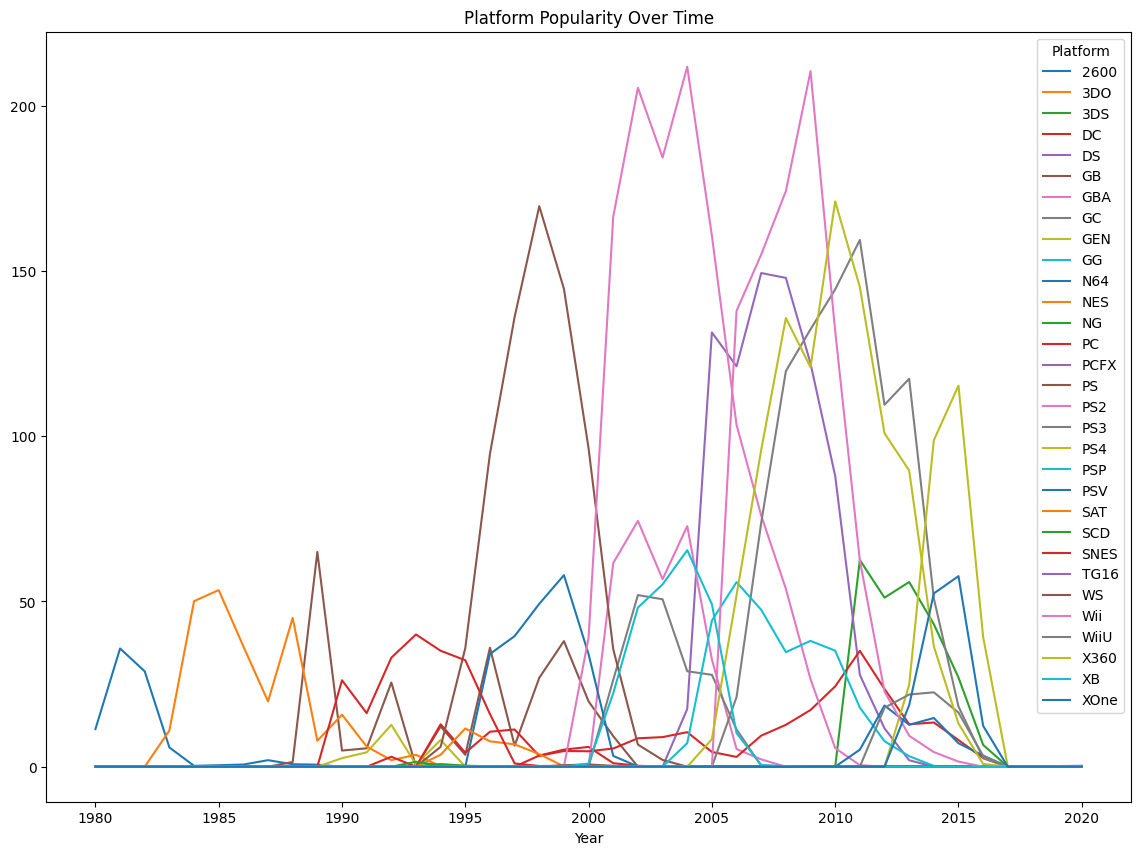

In [66]:
platform_trends = df.groupby(['Year', 'Platform']).sum()['Global_Sales'].unstack().fillna(0)
platform_trends.plot(kind='line', figsize=(14,10), title='Platform Popularity Over Time')

In [67]:
top_games_per_platform = df.groupby('Platform').apply(lambda x: x.nlargest(5, 'Global_Sales'))

C:\Users\Dell\AppData\Local\Temp\ipykernel_14400\3201720908.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_games_per_platform = df.groupby('Platform').apply(lambda x: x.nlargest(5, 'Global_Sales'))


<Axes: title={'center': 'Top 10 Games for Wii'}, xlabel='Name'>

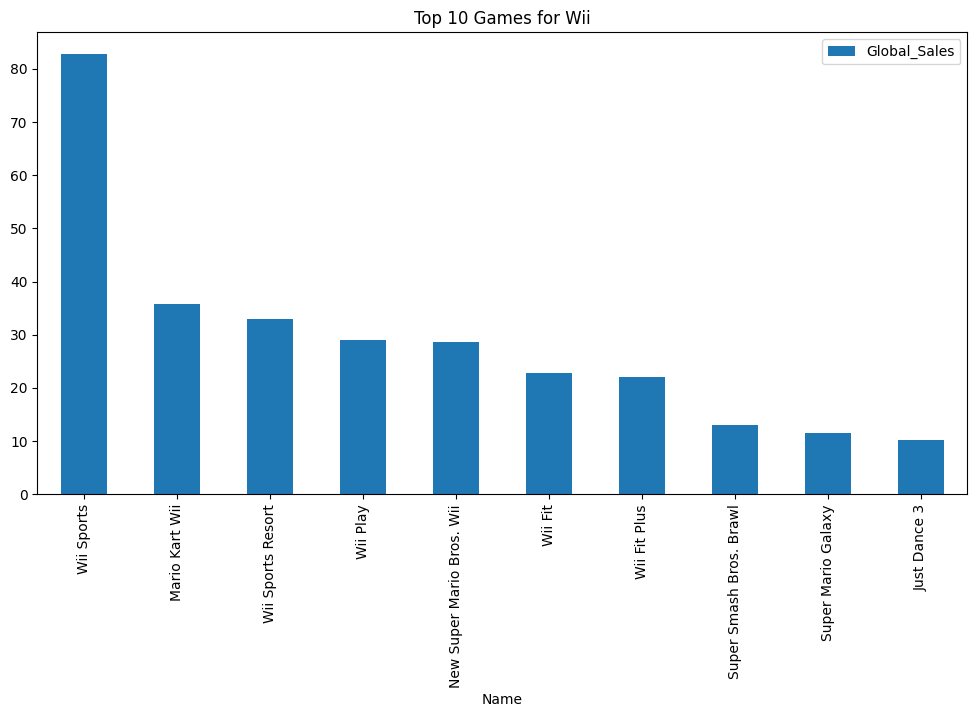

In [68]:
top_games_wii = df[df['Platform'] == 'Wii'][['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
top_games_wii.plot(kind='bar', x='Name', y='Global_Sales', figsize=(12,6), title='Top 10 Games for Wii')

<Axes: xlabel='Genre', ylabel='Genre'>

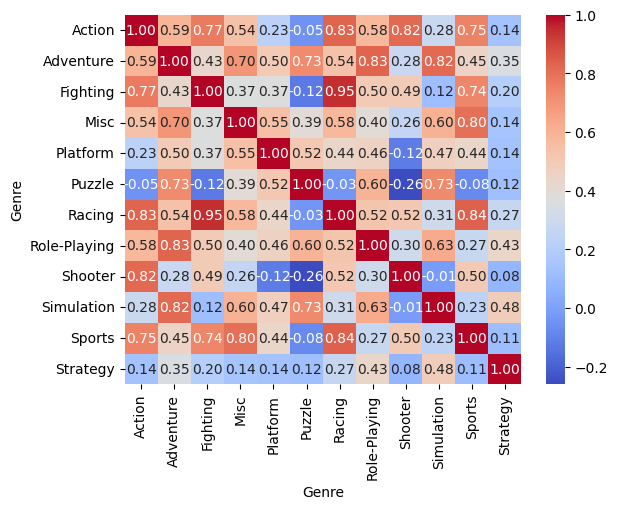

In [69]:
platform_genre_correlation = df.groupby(['Platform', 'Genre']).sum()['Global_Sales'].unstack().corr()
sns.heatmap(platform_genre_correlation, annot=True, cmap="coolwarm", fmt=".2f")

<Axes: title={'center': 'Platform Lifespan'}, ylabel='Platform'>

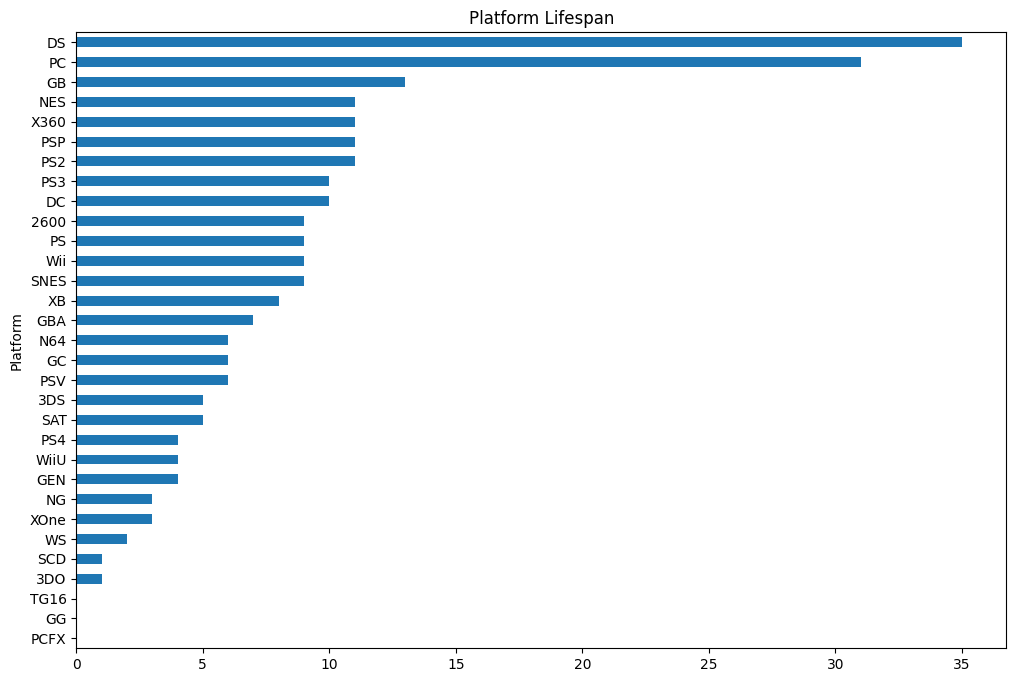

In [70]:
platform_lifespan = df.groupby('Platform')['Year'].agg(['min', 'max'])
platform_lifespan['Lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
platform_lifespan['Lifespan'].sort_values().plot(kind='barh', figsize=(12,8), title='Platform Lifespan')